***
____
![revit](https://i.ibb.co/bQ3dB8C/curso-revit.png)

***
***


# Clase 05
## Regresión Lineal

In [1]:
import pandas as pd
import numpy as np

In [3]:
df_publicidad = pd.read_csv("Advertising.csv")

In [4]:
df_publicidad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
import seaborn as sb

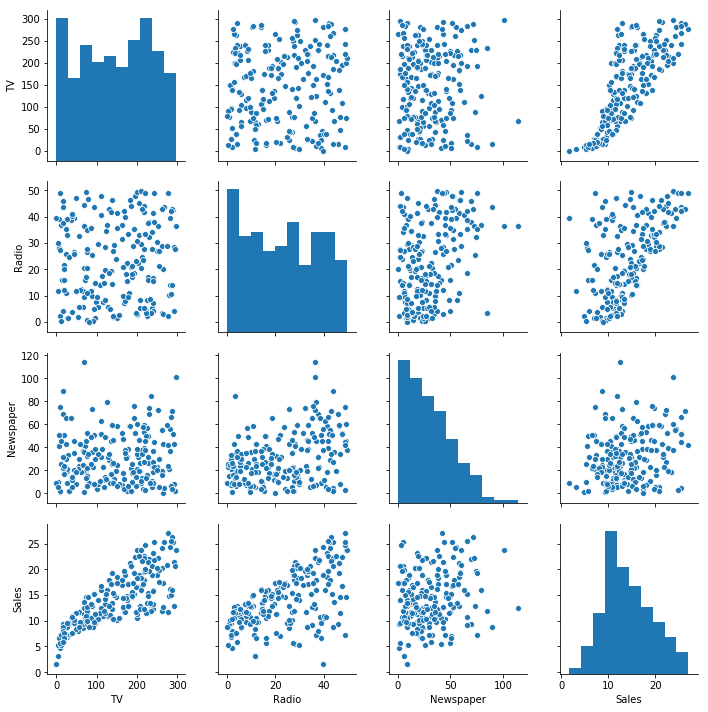

In [7]:
sb.pairplot(df_publicidad, palette="husl", aspect = 1)

In [10]:
import statsmodels.formula.api as reg

In [11]:
modelo1 = reg.ols(formula="Sales~TV", data = df_publicidad).fit()

In [13]:
modelo1.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [14]:
modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 16 Feb 2019   Prob (F-statistic):           1.47e-42
Time:                        14:42:24   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
modelo1.rsquared

0.611875050850071

In [16]:
prediccion = modelo1.predict(pd.DataFrame(df_publicidad["TV"]))

In [17]:
prediccion[:10]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
5     7.446162
6     9.765950
7    12.746498
8     7.441409
9    16.530414
dtype: float64

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

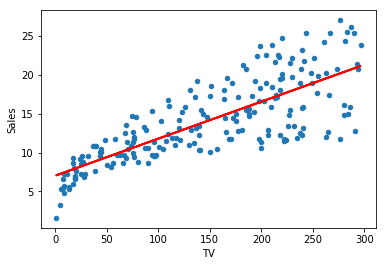

In [19]:
df_publicidad.plot(kind = "scatter", x = "TV", y ="Sales")
plt.plot(pd.DataFrame(df_publicidad["TV"]), prediccion, c="red", linewidth = 2)

In [20]:
df_publicidad["pred"] = modelo1.predict(pd.DataFrame(df_publicidad["TV"]))

In [21]:
df_publicidad["error"] = df_publicidad.Sales - df_publicidad.pred

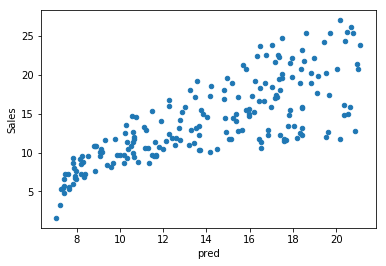

In [22]:
df_publicidad.plot(kind = "scatter", x = "pred", y ="Sales")

In [23]:
ECM = (df_publicidad["error"]**2).mean()
ECM

10.512652915656757

In [24]:
RSM = ECM**0.5
RSM

3.2423221486546887

In [25]:
vent_prom = df_publicidad.Sales.mean()
vent_prom

14.0225

In [26]:
var_por = RSM/vent_prom
var_por

0.23122283106826091

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.38598196, -6.82614689, -5.26631183, -3.70647677, -2.14664171,
        -0.58680664,  0.97302842,  2.53286348,  4.09269854,  5.65253361,
         7.21236867]),
 <a list of 10 Patch objects>)

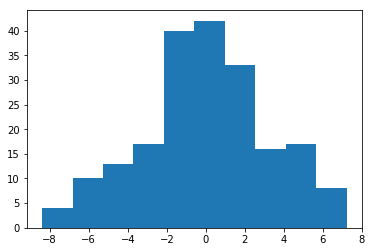

In [25]:
plt.hist(df_publicidad.error)

# Regresión lineal múltiple en Python
## El paquete statsmodel para regresión múltiple
* Sales ~TV
* Sales ~Newspaper
* Sales ~Radio
* Sales ~TV+Newspaper
* Sales ~TV+Radio
* Sales ~Newspaper+Radio
* Sales ~TV+Newspaper+Radio

In [28]:
#Añadir el Newspaper al modelo existente
modelo2 = reg.ols(formula="Sales~TV+Newspaper", data = df_publicidad).fit()

In [29]:
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Fri, 15 Feb 2019   Prob (F-statistic):           3.95e-45
Time:                        14:15:32   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
ECM = ((df_publicidad.Sales -  modelo2.predict(df_publicidad[["TV", "Newspaper"]]))**2).mean()
ECM

9.592809059484136

In [36]:
RSM = ECM**0.5
RSM

3.097226026541191

In [37]:
var_por = RSM/vent_prom
var_por

0.22087545206212805

In [39]:
#Añadir la Radio al modelo existente
modelo3 = reg.ols(formula="Sales~TV+Radio", data = df_publicidad).fit()

In [40]:
modelo3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Fri, 15 Feb 2019   Prob (F-statistic):           4.83e-98
Time:                        14:19:21   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
ECM = ((df_publicidad.Sales -  modelo3.predict(df_publicidad[["TV", "Radio"]]))**2).mean()
ECM

2.784569900338091

In [43]:
RSM = ECM**0.5
RSM

1.6687030593661927

In [44]:
var_por = RSM/vent_prom
var_por

0.1190018227396108

In [45]:
#Añadir la Radio al modelo existente
modelo4 = reg.ols(formula="Sales~TV+Radio+Newspaper", data = df_publicidad).fit()

In [46]:
modelo4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 15 Feb 2019   Prob (F-statistic):           1.58e-96
Time:                        14:20:53   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
ECM = ((df_publicidad.Sales -  modelo4.predict(df_publicidad))**2).mean()
ECM

2.784126314510937

In [48]:
RSM = ECM**0.5
RSM

1.66857014072257

In [49]:
var_por = RSM/vent_prom
var_por

0.11899234378481509

## Multicolinealidad 
#### Factor Inflación de la Varianza
* VIF = 1 : Las variables no están correlacionadas
* VIF < 5 : Las variables tienen una correlación moderada y se pueden quedar en el modelo
* VIF >5 : Las variables están altamente correlacionadas y deben desaparecer del modelo.

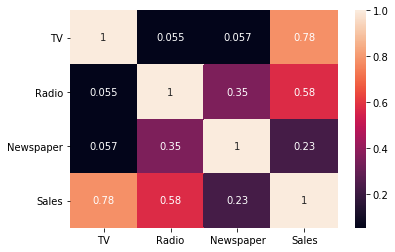

In [106]:
sb.heatmap(df_publicidad.corr(), annot=True)

In [50]:
# Newspaper ~ TV + Radio -> R^2 VIF = 1/(1-R^2)
lm_n = reg.ols(formula="Newspaper~TV+Radio", data = df_publicidad).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1-rsquared_n)
VIF

1.1451873787239288

In [51]:
# TV ~ Newspaper + Radio -> R^2 VIF = 1/(1-R^2)
lm_tv = reg.ols(formula="TV~Newspaper+Radio", data=df_publicidad).fit()
rsquared_tv = lm_tv.rsquared
VIF = 1/(1-rsquared_tv)
VIF

1.0046107849396502

In [107]:
# Radio ~ TV + Newspaper -> R^2 VIF = 1/(1-R^2)
lm_r = reg.ols(formula="Radio~Newspaper+TV", data=df_publicidad).fit()
rsquared_r = lm_r.rsquared
VIF = 1/(1-rsquared_r)
VIF

1.1433660600600444

Al momento de medir el ajuste del modelo no es bueno hacerlo sobre el mismo conjunto de datos con los cuales se entreno, por lo cual es necesario dividir el data set en datos de entrenamiento y de prueba o validación.

# Dividir el dataset en conjunto de entrenamiento y de testing

In [53]:
df_publicidad.head()

,TV,Radio,Newspaper,Sales,pred,error
0,230.1,37.8,69.2,22.1,17.970775,4.129225
1,44.5,39.3,45.1,10.4,9.147974,1.252026
2,17.2,45.9,69.3,9.3,7.850224,1.449776
3,151.5,41.3,58.5,18.5,14.234395,4.265605
4,180.8,10.8,58.4,12.9,15.627218,-2.727218


In [55]:
a = np.random.randn(len(df_publicidad))

(array([ 7., 17., 26., 29., 48., 33., 20., 12.,  7.,  1.]),
 array([-2.21297362, -1.70105735, -1.18914108, -0.67722481, -0.16530854,
         0.34660772,  0.85852399,  1.37044026,  1.88235653,  2.3942728 ,
         2.90618907]),
 <a list of 10 Patch objects>)

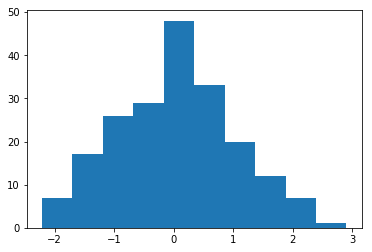

In [56]:
plt.hist(a)

In [66]:
indice = (a<0.8)

In [67]:
df_train = df_publicidad[indice]
df_test = df_publicidad[~indice]

In [68]:
len(df_train), len(df_test)

(157, 43)

In [69]:
import statsmodels.formula.api as reg
lm = reg.ols(formula="Sales~TV+Radio", data=df_train).fit()

In [70]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     788.7
Date:                Fri, 15 Feb 2019   Prob (F-statistic):           1.21e-81
Time:                        14:54:01   Log-Likelihood:                -289.94
No. Observations:                 157   AIC:                             585.9
Df Residuals:                     154   BIC:                             595.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2611      0.297     10.997      0.000       2.675       3.847
TV             0.0447      0.001     30.979      0.000       0.042       0.048
Radio          0.1829      0.009     21.206      0.000       0.166       0.200
==============================================================================
Omnibus:                       21.234   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.265
Skew:                          -0.944   Prob(JB):                     3.26e-06
Kurtosis:                       3.547   Cond. No.                         405.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Validación del modelo con el df test

In [71]:
sales_pred = lm.predict(df_test)
sales_pred

1      12.438106
15     20.723807
25     15.660449
27     17.054425
34      7.797704
38     10.071400
46      9.083671
52     20.565938
54     20.277959
55     21.191228
59     18.080042
83     14.458027
85     15.267491
87     15.636906
90     10.164276
101    23.156813
111    21.020992
119     7.054674
128    22.075288
130    10.533824
131    15.653608
136    11.537864
140     9.652917
144    10.270444
147    23.099588
148    12.330230
152    16.360333
157    10.199270
160    14.286737
166    10.937439
167    13.462006
168    17.211373
171    14.440921
173    12.091844
178    16.058276
179    12.496908
180    10.741152
184    18.508389
185    20.677762
190    12.543615
193    18.402226
197    12.878816
199    15.215394
dtype: float64

In [74]:
ECM = ((df_test.Sales - sales_pred)**2).mean()
ECM

4.449355644639603

In [75]:
RSM = ECM**0.5
RSM

2.1093495785762024

In [76]:
sales_mean = np.mean(df_test["Sales"])
var_er = RSM/sales_mean
var_er

0.14456810946569448

In [81]:
df_test["sales_pred"] = sales_pred

C:\Users\S85606\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


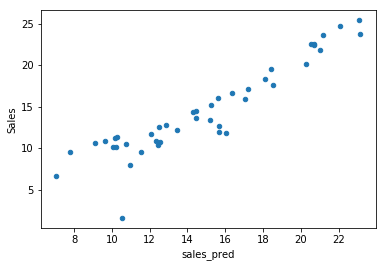

In [82]:
%matplotlib inline
df_test.plot(kind = "scatter", x = "sales_pred", y ="Sales")


# Regresión lineal en Python
## El paquete scikit-learn para regresión lineal y la selección de rasgos

In [83]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import pandas as pd
import numpy as np

In [92]:
df_publicidad = pd.read_csv("datasets/ads/Advertising.csv")

In [93]:
x = df_publicidad[["TV", "Radio", "Newspaper"]]
y = df_publicidad["Sales"]

In [94]:
x.shape, y.shape

((200, 3), (200,))

In [99]:
X = df_publicidad.drop("Sales", axis=1)
Y = df_publicidad["Sales"]

In [100]:
x.shape, y.shape

((200, 3), (200,))

In [101]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, 2, step=1)
selector = selector.fit(X,Y)

In [108]:
selector.support_

array([ True,  True, False])

In [109]:
selector.ranking_

array([1, 1, 2])

In [113]:
from sklearn.linear_model import LinearRegression

In [112]:
df_publicidad.drop("Sales", axis=1).columns[selector.support_]

Index(['TV', 'Radio'], dtype='object')

In [114]:
X_pred = X[["TV", "Radio"]]

In [115]:
lm = LinearRegression()
lm.fit(X_pred, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [116]:
lm.intercept_

2.9210999124051362

In [117]:
lm.coef_

array([0.04575482, 0.18799423])

In [118]:
lm.score(X_pred, Y)

0.8971942610828956

In [120]:
lm.predict(X_pred)[:10]

array([20.55546463, 12.34536229, 12.33701773, 17.61711596, 13.22390813,
       12.51208449, 11.71821241, 12.10551553,  3.7093792 , 12.55169696])

In [121]:
df_publicidad["pred"] = lm.predict(X_pred)

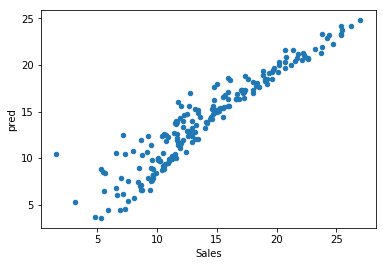

In [122]:
df_publicidad.plot(kind = "scatter", x = "Sales", y = "pred")